In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names= np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [2]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
boston=([data]+[target]+[feature_names])

In [6]:
boston

[array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

In [7]:
df=pd.DataFrame(data,columns=feature_names)

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
df['PRICE']=target

In [10]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Text(0.5, 1.0, 'RAD')

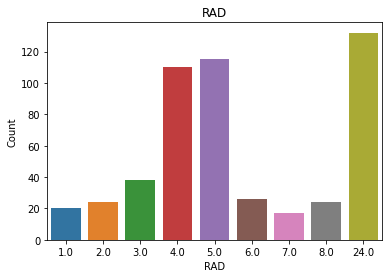

In [12]:
sns.countplot(data=df,x="RAD")
plt.xlabel("RAD")
plt.ylabel("Count")
plt.title("RAD")

<ipython-input-13-05597c5260f2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['INDUS'], label = 'Skewness: %.2f'%(df['INDUS'].skew()))


Text(0.5, 1.0, 'Proportion of Non - Retail Business Acres Per Town')

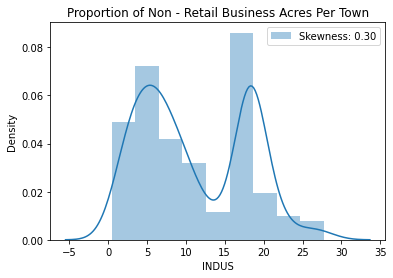

In [13]:
sns.distplot(df['INDUS'], label = 'Skewness: %.2f'%(df['INDUS'].skew()))
plt.legend(loc = 'best')
plt.title('Proportion of Non - Retail Business Acres Per Town')

In [21]:
df1=df.drop(['CRIM','ZN','CHAS','NOX','AGE','DIS','RAD','TAX','B','PRICE'],axis=1)
df1

,INDUS,RM,PTRATIO,LSTAT
0,2.31,6.575,15.3,4.98
1,7.07,6.421,17.8,9.14
2,7.07,7.185,17.8,4.03
3,2.18,6.998,18.7,2.94
4,2.18,7.147,18.7,5.33
...,...,...,...,...
501,11.93,6.593,21.0,9.67
502,11.93,6.120,21.0,9.08
503,11.93,6.976,21.0,5.64
504,11.93,6.794,21.0,6.48


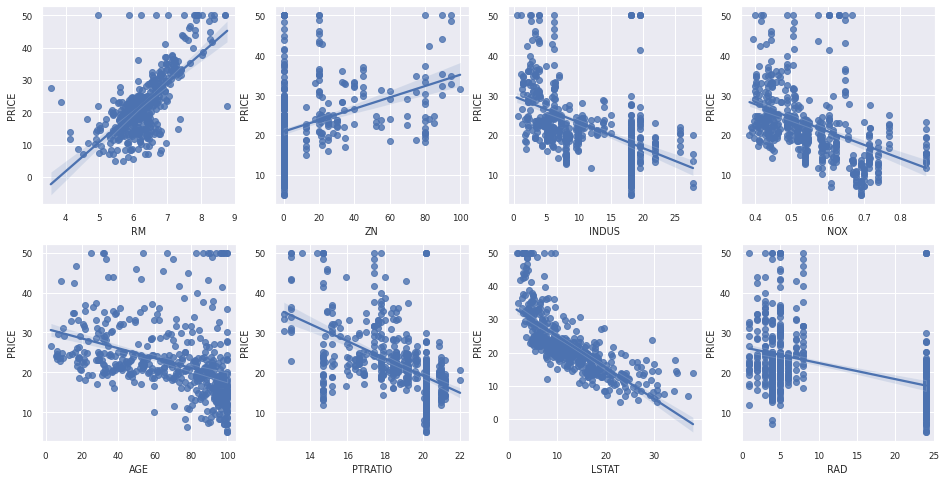

In [19]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

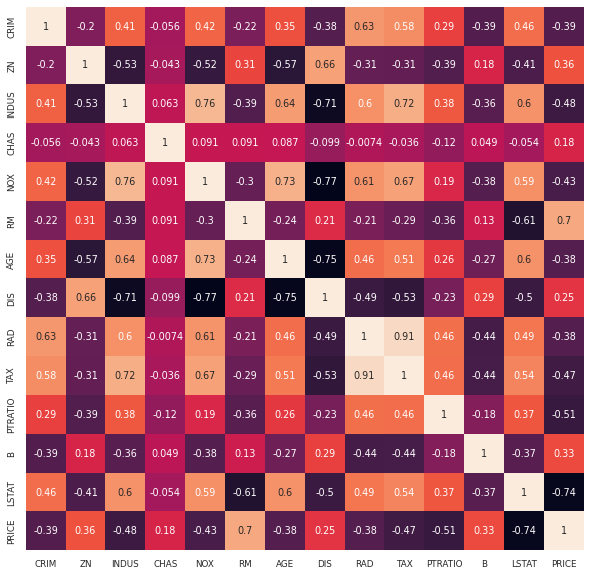

In [20]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
from sklearn.model_selection import train_test_split

X_data=df1
y_data=df['PRICE']
X_train, X_test, y_train, y_test=train_test_split(X_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 4) (404,)
(102, 4) (102,)


In [44]:
X_train

,INDUS,RM,PTRATIO,LSTAT
266,3.97,7.014,13.0,14.79
501,11.93,6.593,21.0,9.67
297,13.92,5.790,16.0,15.84
388,18.10,4.880,20.2,30.62
477,18.10,5.304,20.2,24.91
...,...,...,...,...
241,4.93,6.095,16.6,12.40
253,5.86,8.259,19.1,3.54
390,18.10,5.713,20.2,17.11
155,19.58,6.152,14.7,15.02


In [45]:
y_train

266    30.7
501    22.4
297    20.3
388    10.2
477    12.0
       ... 
241    20.1
253    42.8
390    15.1
155    15.6
331    17.1
Name: PRICE, Length: 404, dtype: float64

In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled, y_train)
print(lr.coef_ ,lr.intercept_ )

[ 0.21006443  3.11912081 -1.78437348 -4.35624767] 22.39207920792079


In [52]:
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.6685680131124931
0.7142017076935441


In [53]:
y_pred = lr.predict(test_scaled)
y_pred

array([24.53497921, 17.34204635,  9.20927551, 26.68838659, 27.89603438,
       20.99432853, 20.91679004, 37.83609963, 29.98120931, 25.83183955,
       26.99037179, 21.72162169, 22.91846017, 24.09997225, 33.13535469,
       39.27460883, 18.05292388, 27.97730533, 21.43881849, 23.95696141,
       28.01747856, 12.86230362, 23.77423825, 16.55336489, 27.58006502,
       17.72602812, 22.54049496, 15.42277126, 25.30531012, 36.78632889,
       25.61027241, 27.49683222, 16.64548958, 30.95171358, 42.18773786,
       17.025043  , 23.58835578, 38.48060739, 17.66886622, 25.67885747,
       16.97457497, 26.43931336, 22.12614529, 32.07678422, 17.60856822,
       17.24453939, 19.69389717, 12.42270208, 38.61708312, 24.80436507,
       30.08771034, 24.37417527, 17.51007277, 25.32718213, 17.30355265,
       18.26009409, 22.14827718, 21.60495142, 19.61978858, 19.49495767,
       20.472375  , 33.26451457, 20.9800075 , 18.37396491, 21.65214021,
       24.08952829, 27.06979664, 17.21106902, 21.97272784, 38.99

절편 값: 22.39207920792079
회귀계수: [ 0.2  3.1 -1.8 -4.4]


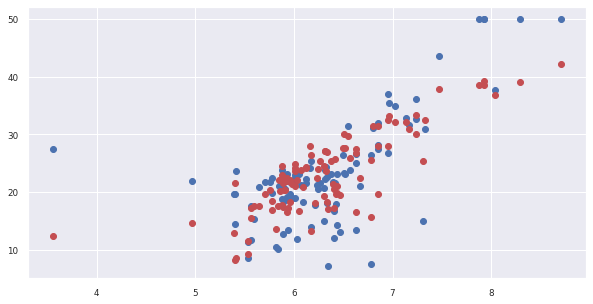

In [55]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))
plt.figure(figsize=(10,5))
plt.scatter(X_test['RM'], y_test, label='y_test')
plt.scatter(X_test['RM'], y_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()      

평균제곱근오차 4.8324593192372145


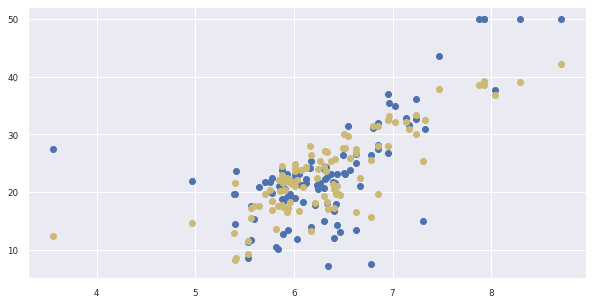

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_pred = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_pred, y_test))
print('평균제곱근오차', mse)
plt.figure(figsize=(10,5))
plt.scatter(X_test['RM'], y_test, label='y_test')
plt.scatter(X_test['RM'], ly_pred, c='y', label='ly_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

절편 값: 22.39207920792079
회귀계수: [ 0.2  3.1 -1.8 -4.4]


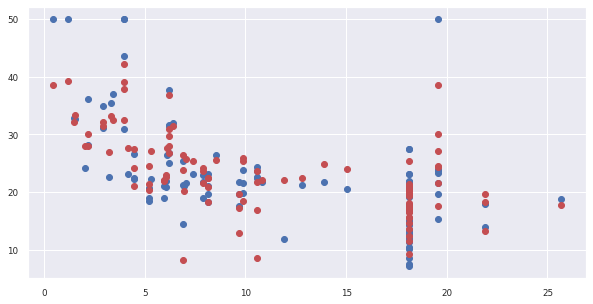

In [59]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))
plt.figure(figsize=(10,5))
plt.scatter(X_test['INDUS'], y_test, label='y_test')
plt.scatter(X_test['INDUS'], y_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()      

평균제곱근오차 4.8324593192372145


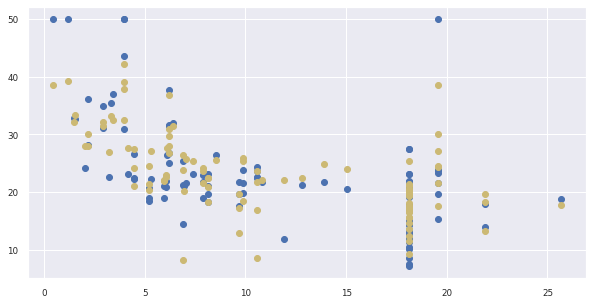

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_pred = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_pred, y_test))
print('평균제곱근오차', mse)
plt.figure(figsize=(10,5))
plt.scatter(X_test['INDUS'], y_test, label='y_test')
plt.scatter(X_test['INDUS'], ly_pred, c='y', label='ly_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

절편 값: 22.39207920792079
회귀계수: [ 0.2  3.1 -1.8 -4.4]


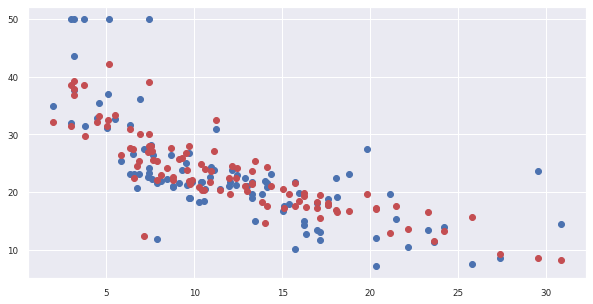

In [61]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))
plt.figure(figsize=(10,5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')
plt.scatter(X_test['LSTAT'], y_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()      

평균제곱근오차 4.8324593192372145


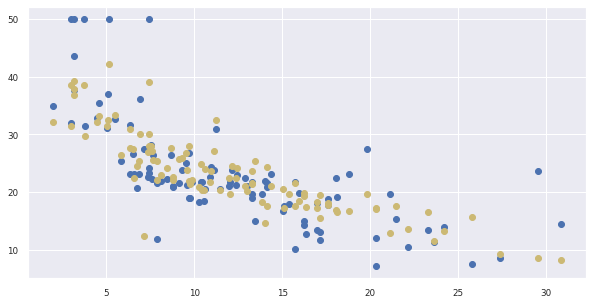

In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_pred = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_pred, y_test))
print('평균제곱근오차', mse)
plt.figure(figsize=(10,5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')
plt.scatter(X_test['LSTAT'], ly_pred, c='y', label='ly_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [ ]:
#해야할 것것
0. EDA (optional)

1. LSTAT, RM, PTRTIO, INDUS 만 추출 

2. Standscaler()

3. 예측

4. 실제 데이터와 예측 데이터를 산점도 표시

5. 산점도위에 회기그래프(절편과 기울기, optional)